# ## Top 5 YTD % Change on Live Stock Commodities


In [1]:
import tradingeconomics as te
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
te.login('jupyter:jupyter')

'You are logged in as a jupyter:jupyter'

In [3]:
data = te.getMarketsData(marketsField = 'commodities', output_type = 'df')
list_of_commodities = data['Group'].unique()
list_of_commodities

array(['Livestock', 'Index', 'Energy', 'Industrial', 'Agricultural',
       'Metals'], dtype=object)

In [4]:
 def top_5_ytd_percentual_change(commodities_group):   
    ytd = data.query(f'Group == "{commodities_group}"').sort_values(by='YTDPercentualChange', ascending=False)
    ytd = ytd.head().reset_index(drop=True)
    ytd = ytd[['Name','Last','Group','YTDPercentualChange']]
    return ytd

In [5]:
top_5_ytd_percentual_change(list_of_commodities[1])


,Name,Last,Group,YTDPercentualChange
0,EU Carbon Permits,74.050,Index,126.3142
1,Baltic Dry,2881.000,Index,110.9078
2,CRB Index,241.005,Index,35.1739
3,S&P GSCI,2665.228,Index,34.8148
4,LME Index,4329.200,Index,26.7887


### Top 5 on Poultry

##### Getting a list of all countries available

In [6]:
all_countries_available = te.getCmtCountry(output_type='df')


##### We do some data treatment to get 'name' 

In [7]:
all_countries_available_treated = all_countries_available[['name','iso']]
all_countries_available_treated = all_countries_available_treated.drop([0,288,289])

all_countries_available_list = all_countries_available_treated['name'].to_list()
all_countries_available_list[0:5]

['Antarctica', 'Bulgaria', 'Myanmar', 'Burundi', 'Belarus']

##### We have to get a commodity category which have some kind of correlation with Poultry. 

In [8]:
te.getCmtCategories(output_type='df').query('name == "Meat & ed offal of poultry, fresh, chill or frozen"')

,id,name,parentId,pretty_name
14,0207,"Meat & ed offal of poultry, fresh, chill or fr...",02,"Meat and edible offal of poultry, fresh, chill..."


#####  We have to check all countries Meat & ed offal of poultry, fresh, chill or frozen to get the main countries importers 

##### to get a country commodity group

In [9]:
def get_country_commodity(country,category,type,year):
    country_with_no_data_list = []
#     print(f'getting {country}')
    country_category = te.getCmtCountryByCategory(country=country,type=type,category=category, output_type='df')
#     print(country_category)
    if country_category is None:
        country_with_no_data_list.append(country)
#         print(country_with_no_data_list)
    else:
        country_category = country_category.query(f'date == {year}')
        country_category = country_category[['country1','value']]
        return country_category.groupby(["country1"]).sum()


##### To get a dataframe with all countries and a specific commodity

In [10]:
def dataframe_countries_commodities(countries_list,category,type,year):

    main_dataframe = pd.DataFrame()
    for country in countries_list:
    #     print(f'passing {country}')
    #     main_dataframe.append(get_country_commodity(country=country,category='Primary Cells and Primary Batteries',type='import',year='2020' ), ignore_index=True)
#         pre_dataframe = get_country_commodity(country=country,category='Primary Cells and Primary Batteries',type='import',year='2020')
        pre_dataframe = get_country_commodity(country=country,category=category,type=type,year=year)
        
        main_dataframe = main_dataframe.append(pre_dataframe)
    return main_dataframe.sort_values('value', ascending=False)

#### Top 5  - Importers

In [11]:
live_stock_top5_importers = dataframe_countries_commodities(countries_list=all_countries_available_list,category='Meat and edible offal of poultry, fresh, chill or frozen', type='import',year='2020')
# live_stock_top5_importers[0:5]

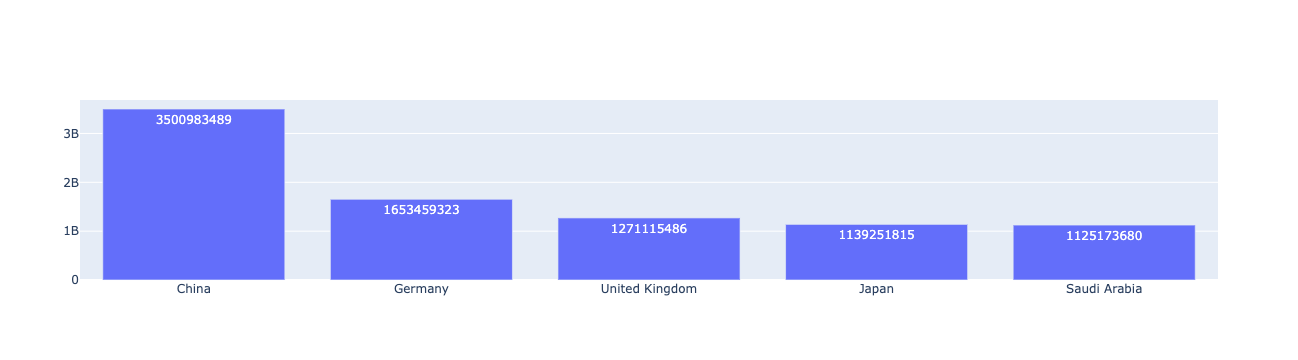

In [12]:
x_import = live_stock_top5_importers.index[0:5]
y_import = live_stock_top5_importers['value'][0:5]
# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x_import, y=y_import,
            text=y_import,
            textposition='auto',
        )])

fig.show(renderer='plotly_mimetype')

### Top 5 - Exporters

In [ ]:
live_stock_top5_exporters = dataframe_countries_commodities(countries_list=all_countries_available_list,category='Meat and edible offal of poultry, fresh, chill or frozen', type='export',year='2020')
# live_stock_top5_exporters[0:5]

In [ ]:
x_export = live_stock_top5_exporters.index[0:5]
y_export = live_stock_top5_exporters['value'][0:5]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x_export, y=y_export,
            text=y_export,
            textposition='auto',
        )])

fig.show(renderer='plotly_mimetype')

In [ ]:
# tennessee.matos@tradingeconomics.com 